# 4.데이터 표현과 특성 공학

+ 연속형 특성: 데이터가 2차원 실수형 배열로 각 열이 데이터 포인트를 설명 ex)픽셀 밝기, 붓꽃 측정값
+ 범주형 특성: 이산형 특성이라고도 불리며, 보통 숫자 값이 아님 ex)제품의 브랜드, 색상, 판매분류

+ 데이터가 어떤 형태의 특성으로 구성되어 있는가보다 데이터를 어떻게 표현하는가가 머신러닝 모델의 성능에 주는 영향이 더 큼!
+ 특정 어플리케이션에 가장 적합한 데이터 표현을 찾는 것을 특성 공학(feature engineering) 이라 한다

## 4.1 범주형 변수

In [2]:
# 실습하기 전 import문
import numpy as np
import pandas as pd
import mglearn
import sklearn
from IPython.display import display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [3]:
# 한글 Font
from matplotlib import rc
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
%matplotlib inline

In [1]:
import os
import pandas as pd
import mglearn
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정하고
# "names" 매개변수로 열 이름을 제공합니다
data = pd.read_csv(
os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
'marital-status', 'occupation', 'relationship', 'race', 'gender',
'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
'income'])
# 예제를 위해 몇개의 열만 선택합니다
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
'occupation', 'income']]
# IPython.display 함수는 주피터 노트북을 위해 포맷팅된 출력을 만듭니다
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


+ 예제에 사용할 데이터는 1994년 인구 조사 데이터베이스에서 추출한 미국 성인의 소득 데이터셋
  + 연속형 특성:age,hours-per-week
  + 범주형 특성:workclass,education,gender,occupation
  + 분류:income

+ 로지스틱 회귀 분류기를 이용해 학습
  + w[i]와b는 훈련 세트로 부터 학습되는 계수
  + x[i]는 입력 특성,숫자여만 함.
+ 로지스틱 회귀를 사용하려면 데이터를 다른 방식으로 표현해야 함!

### 4.1.1 원-핫-인코딩(가변수)
+ 범주형 변수를 표현하는데 가장 널리 쓰이는 방법, 원-아웃-오브-엔 인코딩 또는 가변수 라고 한다
+ 범주형 변수를 0 또는 1 값을 가진 하나 이상의 새로운 특성으로 바꾼 것  
  
위의 예제 데이터에 적용

+ workclass 특성에 Goverment Employee, Private Employee, Self Employed, Self Employed Incorporated 값이 존재 네 개의 새로운 특성 Goverment Employee, Private Employee, Self Employed, Self Employed Incorporated 를 만듦
+ 어떤 사람의 workclass 값에 해당하는 특성은 1이 되고, 나머지 세 특성은 0 이 됨

##### 범주형 데이터 문자열 확인하기
+ 데이터셋을 읽고 나면, 먼저 열에 어떤 의미있는 범주형 데이터가 있는지 확인해보는게 좋음, pandas에서
series에 있는 value_counts 메서드 사용

In [4]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [5]:
print("원본 특성:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

+ pandas에서는 get_dummies 함수를 사용해 데이터를 매우 쉽게 인코딩, 객체 타입이나 범주형을 가진 열을 자동으로 변환
+ 범주형 특성은 값마다 새로운 특성으로 확장

In [6]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# NumPy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


+ data_dummmies의 value 속성을 이용해 DataFrame을 Numpy 배열로 바꿀 수 있으며, 이를 이용해 머신러닝
모델을 학습

##### 주의점
+ pandas에서 열 인덱싱은 범위 끝을 포함
+ 이와는 달리 Numpy 배열의 슬라이싱은 마지막 범위를 미포함

In [9]:
import numpy as np
np.arange(0,20)[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.81


+ 데이터가 scikit-learn에서 사용할 수 있는 형태가 되었으므로, 이전과 같은 방식을 사용

##### 주의점
+ 훈련 세트와 테스트 세트에 범주형 값이 같은 방식으로 표현되어야 한다.
+ 훈련 데이터와 테스트 데이터 포인트를 모두 포함하는 DataFrame을 사용해 get_dummies 함수를 호출하든지, 또는 각각 get_dummies 를 호출한 후에 훈련 세트와 테스트 세트의 열 이름을 비교해서 같은 속성인지를
확인

### 4.1.2 숫자로 표현된 범주형 특성

In [11]:
# In[9]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame을 만듭니다
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1],
'범주형 특성': ['양말', '여우', '양말', '상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [12]:
# In[10]:
# 문자열 특성만 인코딩된 것을 볼 수 있음.
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [13]:
# In[11]:
# '숫자 특성'도 가변수로 만들고 싶다면, columns 매개변수에 인코딩하고 싶은 열을 명시하기
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


## 4.2 OneHotEncoder와 ColumnTransformer: scikit-learn 에서 범주형 변수 다루기
+ 훈련 세트와 테스트 세트를 같은 방식으로 다루기 쉬운 것이 scikit-learn의 장점  
-> 이런 장점을 가지고 원-핫-인코딩을 수행할 수 있음.
+ 원-핫-인코딩은 OneHotEncoder 클래스에 구현되어 있음.  
OneHotEncoder는 모든 열에 인코딩을 수행함.

In [14]:
# In[12]:
from sklearn.preprocessing import OneHotEncoder
# sparse=False로 설정하면 OneHotEncode가 희소 행렬이 아니라 넘파이 배열을 반환합니다
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))
# 문자열 특성과 정수 특성이 모두 변환된 것을 볼 수 있음.

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [15]:
# In[13]:
# scikit-learn의 출력은 DataFrame이 아니기 때문에 열 이름이 없다.
# 원본 범주형 변수 이름을 얻으려면 get_features_names 메서드를 사용한다.
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']


In [16]:
import os
data = pd.read_csv(
os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
'marital-status', 'occupation', 'relationship', 'race', 'gender',
'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
'income'])
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
'occupation', 'income']]

In [17]:
# In[14]:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [18]:
# In[15]:
# ColumnTransformer 클래스는 입력 데이터에 있는 열마다 다른 변환을 적용할 수 있다 .
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ct = ColumnTransformer(
[("scaling", StandardScaler(), ['age', 'hours-per-week']),
("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'
])])

In[15] 설명  
+ 범주형 변수에 원-핫-인코딩을 적용하고, 연속형 변수에는 스케일 조정.
+ 각 열의 변환은 이름, 변환기 객체, 이 변환이 적용될 열을 지정한다.
+ 열은 열 이름이나 정수 인덱스, 불리언 마스크로 선택 가능.

In [19]:
# In[16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# income을 제외한 모든 열을 추출합니다
data_features = data.drop("income", axis=1)
# 데이터프레임과 income을 분할합니다
X_train, X_test, y_train, y_test = train_test_split(
data_features, data.income, random_state=0)
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [20]:
# In[17]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)
X_test_trans = ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수: 0.81


In [21]:
# In[18]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

## 4.3 make_column_transformer를 사용하여
+ ColumnTransformer 생성하기
+ make_column_transformer는 클래스 이름을 기반으로 자동으로 각 단계에 이름을 붙여주는 함수.

In [22]:
# In[19]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
(StandardScaler(), ['age', 'hours-per-week']),
(OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation']))

## 4.4 구간 분할, 이산화 그리고 선형 모델, 트리 모델
+ 데이터를 표현할 때, 데이터가 가진 의미를 잘 파악하는 것과 어떤 모델을 사용할지 정하는 것이 중요하
다.
+ 아주 폭넓게 사용하는 알고리즘에는 선형 모델과 트리 기반 모델이 있다.

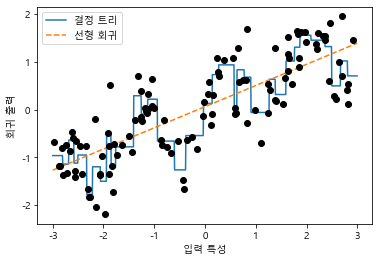

In [23]:
# In[20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="결정 트리")
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

+ 연속형 데이터에 가장 강력한 선형 모델을 만드는 방법 하나는 한 특성을 여러 특성으로 나누는 구간 분할
이다.
+ 구간의 경계를 정의하는 방법에는 균일한 너비 또는 데이터의 분위 사용하기가 있다.
+ KBinsDisCretizer 클래스를 사용해 이런 방법을 구현할 수 있다.
+ KBinsDisCretizer는 한 번에 여러 개의 특성을 적용할 수 있다.
+ binedges 는 특성별로 경곗값이 저장되어 있고 길이가 1인 배열로 출력된다.

In [24]:
# In[21]:
from sklearn.preprocessing import KBinsDiscretizer

In [25]:
# In[22]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [26]:
len(kb.bin_edges_)

1

In [27]:
# In[23]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [28]:
# In[24]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [29]:
# In[25]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

Text(0.5, 0, '입력 특성')

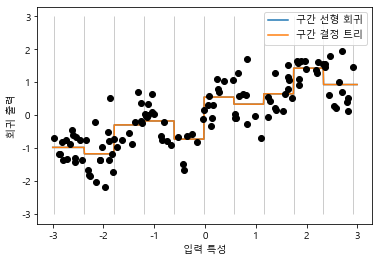

In [30]:
# In[26]:
line_binned = kb.transform(line)
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")

## 4.5 상호작용과 다항식
+ 특별히 특성을 풍부하게 나타내는 또 하나의 방법은 원본 데이터에 상호작용과 다항식을 추가하는 것
+ [그림 4-2]에서 선형 모델은 이런 절편 외에도 기울기도 학습할 수 있음
+ 선형 모델에 기울기를 추가하는 방법은 구간으로 분할된 데이터에 원래 특성(이 그림에서 x축)을 다시 추가하는 것임
+ 밑에 코드는 선형 기존의 선형 모델에 기울기를 추가한 것

In [31]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


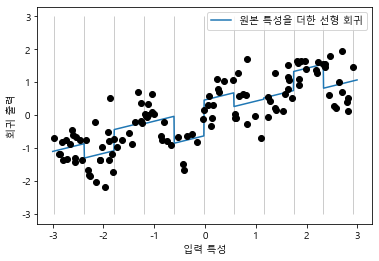

In [32]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0], y, 'o', c='k')

+ x축 특성이 하나이므로 기울기도 하나임
+ 기울기가 모든 구간에서 같으니 유익해 보이지 않고 각 구간에서 다른 기울기를 가지는 게 좋을 것 같음
+ 이런 효과를 위해 데이터 포인트가 있는 구간과 x축 사이의 상호작용 특성을 추가할 수 있는데 이 특성이 구간 특성과 원본 특성의 곱임  
    
    
+ 아래 코드는 이러한 데이터셋을 만들어 줌

In [33]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


+ 데이터셋은 이제 데이터 포인트가 속한 구간과 이 구간에 원본 특성을 곱한 값을 더해 20개의 특성을 가짐
+ 이 곱셈 특성을 각 구간에 대한 x축 특성의 복사본이라고 생각할 수 있음 즉 이 값은 구간 안에서는 원본 특성이고 다른 곳에서는 0임  
  
      
+ 다음 그림은 이 데이터를 사용해 만든 선형 모델의 결과임
+ 다음 그림에서 볼 수 있듯이 이 모델에서는 각 구간에서 절편과 기울기가 모두 다름

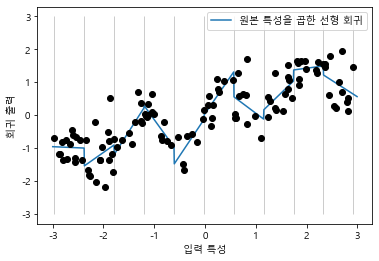

In [34]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

+ 연속형 특성을 확장하는 방법 중 원본 특성의 다항식을 추가하는 방법도 있음
+ 특성 x가 주어지면 x 2, x 3, x ** 4 등을 시도해볼 수 있음
+ 이 방식이 preprocessing 모듈의 PolynomiaFeatures에 구현되어 있음

In [35]:
from sklearn.preprocessing import PolynomialFeatures
# x ** 10까지 고차항을 추가합니다
# 기본값인 "include_bias=True"는 절편에 해당하는 1인 특성을 추가합니다
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

10차원을 사용했으므로 10개의 특성이 만들어짐

In [36]:
print("X_poly.shape:", X_poly.shape)

X_poly.shape: (120, 10)


X와 X_poly의 값을 비교해보자ㅡ

In [38]:
print("X 원소:\n", X[:5])
print("X_poly 원소:\n", X_poly[:5])

X 원소:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소:
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


각 특성의 차수를 알려주는 get_feature_names 메서드를 사용해 특성의 의미를 알 수 있음

In [39]:
print("항 이름:\n", poly.get_feature_names())

항 이름:
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


X_poly의 첫 번째 열은 X와 같고 다른 열은 첫 번째 열의 거듭제곱이어서 어떤 값은 매우 크게 나오는 것
을 볼 수 있음

##### 다항식 특성을 선형 모델과 함께 사용하면 전형적인 다항 회귀 모델이 됨

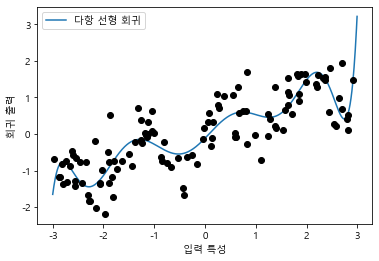

In [40]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

+ 다항식 특성은 1차원 데이터셋에서도 매우 부드러운 곡선을 만듦
+ 그러나 고차원 다항식은 데이터가 부족한 영역에서 너무 민감하게 동작함

비교를 위해 아무런 변환도 거치지 않은 원본 데이터에 커널 SVM 모델을 학습시켜보자

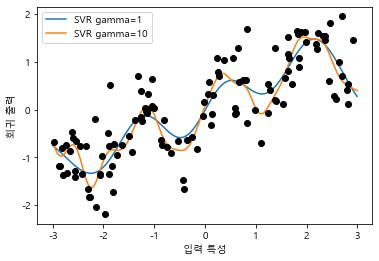

In [42]:
from sklearn.svm import SVR
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

+ 더 복잡한 모델인 커널 SVM을 사용해 특성 데이터를 변환하지 않고 다항 회귀와 비슷한 복잡도를 가진
예측을 만들었음

+ 상호작용과 다항식을 위한 더 현실적인 애플리케이션으로 보스턴 주택 가격 데이터셋을 이용해보자
+ 2장에서 다항식 특성을 적용한 이 데이터셋에 이 특성들이 어떻게 구성되었는지 살표보고, 다항식 특성이 얼마나 도움이 되는지 보자
+ 먼저 데이터를 읽어들이고 MinMaxScaler를 사용해 스케일을 1에서 1사이로 조정함

In [43]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
random_state=0)
# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

+ 이제 차수를 2로 하여 다항식 특성을 뽑음

In [44]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape:", X_train.shape)
print("X_train_poly.shape:", X_train_poly.shape)

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


+ 이 데이터는 원래 특성이 13개인데 105개의 교차 특성으로 확장되었음
+ degree=2로 하면 원본 특성에서 두 개를 뽑아 만들 수 있는 모든 곱을 얻을 수 있음
+ 어떤 원본 특성이 곱해져 새 특성이 만들어졌는지 정확한 관계를 보려면 get_feature_names 메서드를 사
용함

In [45]:
print("다항 특성 이름:\n", poly.get_feature_names())

다항 특성 이름:
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


상호작용 특성이 있는 데이터와 없는 데이터에 대해 Ridge를 사용해 성능을 비교해보자

In [47]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


+ 확실히 상호작용과 다항식 특성이 Ridge의 성능을 크게 높였음
+ 그러나 랜덤포레스트 같이 더 복잡한 모델을 사용하면 이야기가 달라짐

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.775


+ 특성을 추가지 않아도 랜덤 포레스트는 Ridge의 성능과 맞먹음
+ 오히려 상호작용과 다항식을 추가하면 성능이 조금 줄어듦

## 4.6 일변량 비선형 변환
+ 비선형변환
  + 제곱 항이나 세제곱 항을 추가하면 선형 회귀 모델에 도움이 됨.
  + log,exp,sin 같은 수학 함수를 적용하는 방법도 특성 변환에 유용.
  + 트리기반 모델은 특성의 순서에만 영향받음.(영향력이 떨어짐.)
  + 선형 모델과 신경망은 각 특성의 스케일과 분포에 밀접하게 연관되어 있음.
  + log와 exp 함수: 데이터의 스케일을 변경해 선형 모델과 신경망의 성능을 올리는 데 도움을 줌.
  + sin과 cos 함수: 주기적인 패턴이 들어 있는 데이터를 다룰 때 편리.  
    
      
        
        
+ 대부분의 모델은 각 특성이 정규분포와 비슷할 때 최고의 성능을 냄.
+ log나 exp 같은 함수를 사용해서 이런 종 모양을 만드는 방법도 있음
+ 이런 변환이 도움이 되는 전형적인 경우: '정수 카운트 데이터'를 다룰 때!!
+ 카운트 데이터의 예: "사용자가 얼마나 자주 로그인하는가?" (카운트에는 음수가 없고, 특별한 통계 패턴을 따르는 경우가 많음)

In [49]:
#In[42] - 카운트 데이터를 만들어 사용
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])
#타깃값을 만들기 위해 먼저 정규분포를 만들고 그다음 poisson 함수를 적용하였음

[ 56  81  25  20  27  18  12  21 109   7]


In [50]:
#In[43]
print("특성 출현 횟수:\n", np.bincount(X[:, 0]))

특성 출현 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

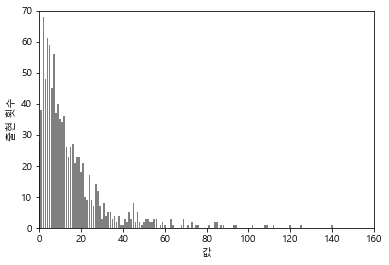

In [51]:
#In[44] - X[0] 특성 값의 히스토그램 그리기
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

+ 선형 모델은 이런 데이터(작은 수치가 많고 큰 수치는 몇 안되는)를 잘 처리하지 못함.
+ 이 데이터에 리지 회귀(=다중 회귀)를 적용해보겠습니다.

In [52]:
#In[45]
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.622


+ 비교적 낮은 R^2 점수(테스트 점수)가 나옴
+ Ridge는 X와 y의 관계를 제대로 모델링하지 못했음
+ 하지만 로그 스케일 변환이 도움이 됨!
   + 대신 log(X+1)을 사용해야함(데이터에 0이 있으면 log 함수 적용 불가)

In [53]:
#In[46]
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, '값')

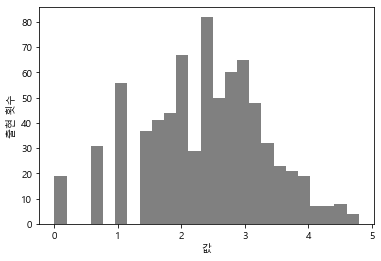

In [54]:
#In[47]
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("출현 횟수")
plt.xlabel("값")

+ 변환 후: 데이터의 분포가 덜 치우쳐 진 것을 확인할 수 있음, 매우 큰 값을 가진 이상치가 보이지 않음.

In [55]:
#In[48]
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.875


+ 로그 스케일을 적용한 결과가 더 좋음(0.622에서 0.875로 증가)

+ 데이터셋과 모델의 조합에 최적인 변환 방법을 찾기란 어려움
+ 이 예에서는 모든 특성이 같은 속성을 가지고 있으나 실제로는 드문 일임
+ 일부 특성만 변환하거나 특성마다 모두 다르게 변환하기도 함
+ but, 이러한 변환은 선형 모델에서는 필수!!(트리 기반 모델에서는 불필요)

+ 구간 분할, 다항식, 상호작용은 데이터가 주어진 상황에서 모델의 성능에 큰 영향을 줄 수 있음
  + 선형 모델이나 나이브 베이즈 모델: 덜 복잡한 모델일 경우 영향이 큼
  + 트리 기반 모델: 스스로 중요한 상호작용을 찾아낼 수 있음, 대부분의 경우 데이터를 명시적으로 변환하지 않아도 됨
  + SVM, 최근접 이웃, 신경망 같은 모델: 이따금 이득을 볼 수 있음

## 4.7 특성 자동 선택
+ 새로운 특성을 만드는 방법이 많으므로 데이터의 차원이 원본 특성의 수 이상으로 증가하기 쉬움
+ 가장 유용한 특성만 선택하고 나머지는 무시해서 특성의 수를 줄이는 것이 좋음
+ 전략:
   + 일변량 통계, 모델 기반 선택, 반복적 선택 (=>타깃값 필요)

### 4.7.1 일변량 통계
+ 일변량 통계에서는 개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지를 계산
+ 핵심 요소: 일변량!!
  + 즉, 각 특성이 독립적으로 평가된다
  + 따라서, 다른 특성과 깊게 연관된 특성은 선택되지 않을 것
+ 분류: f_classif(기본값), 회귀: f_regression을 보통 선택하여 테스트 => '특성을 선택'
+ 계산한 p-값에 기초하여 특성을 제외하는 방식
  + p-값이 매우 높으면 '타깃값과 연관성이 작다'는 뜻이므로 특성을 제외해야 함
+ 특성을 제외할 수 있도록 임계값을 조정하는 매개변수를 사용
  + SelectKBest(고정된 k개의 특성을 선택)
  + SelectPercentile(지정된 비율만큼 특성을 선택)

In [56]:
#In[49] - 의미 없는 노이즈 특성을 데이터에 추가
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
# 고정된 난수를 발생시킵니다
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 데이터에 노이즈 특성을 추가합니다
# 처음 30개는 원본 특성이고 다음 50개는 노이즈입니다
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(
X_w_noise, cancer.target, random_state=0, test_size=.5)
# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택합니다
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)
# 훈련 세트에 적용합니다
X_train_selected = select.transform(X_train)
print("X_train.shape:", X_train.shape)
print("X_train_selected.shape:", X_train_selected.shape)

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


+ get_support 메서드: 선택된 특성을 불리언 값으로 표시해주어 어떤 특성이 선택되었는지를 확인 할 수 있
는 메서드

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x183a7927c10>],
 <a list of 1 Text major ticklabel objects>)

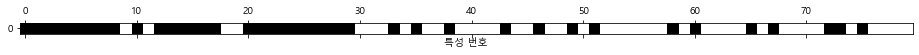

In [57]:
#In[50]
mask = select.get_support()
print(mask)
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

In [58]:
#In[51]
from sklearn.linear_model import LogisticRegression
# 테스트 데이터 변환
X_test_selected = select.transform(X_test)
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(
lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.951
선택된 일부 특성을 사용한 점수: 0.933


+ 일변량 분석을 사용하는 2가지 경우:
  - 1. 너무 많은 특성 때문에 모델을 만들기가 현실적으로 어려울 때
  - 2. 많은 특성들이 확실히 도움이 안 된다고 생각될 때

### 4.7.2 모델 기반 특성 선택
+ 지도 학습 머신러닝 모델을 사용하여 특성의 중요도를 평가해서 가장 중요한 특성들만 선택
+ 특성 선택에 사용하는 지도 학습 모델은 최종적으로 사용할 지도 학습 모델과 같을 필요는 없음!!
  + 결정 트리 관련 모델: 각 특성의 중요도가 담겨 있는 featureimportances 속성을 제공
  + 선형 모델 계수(가중치)의 절댓값도 특성의 중요도를 재는 데 사용
  + L1 규제를 사용한 선형 모델은 일부 특성의 계수만 학습
+ 모델 기반 특성 선택은 한 번에 모든 특성을 고려하므로 상호작용 부분을 반영할 수 있음
+ 모델 기반 특성 선택은 SelectFromModel에 구현되어 있음

In [59]:
#In[52]- 모델 기반 특성 선택이 구현되어 있음
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
RandomForestClassifier(n_estimators=100, random_state=42),
threshold="median")
#랜덤포레스트 분류기를 사용했음(특성 중요도를 계산해주는)

+ SelectFromModel은 중요도가 지정한 임계치보다 큰 모든 특성을 선택

In [60]:
#In[53]
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:", X_train.shape)
print("X_train_l1.shape:", X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([<matplotlib.axis.YTick at 0x183a797b040>],
 <a list of 1 Text major ticklabel objects>)

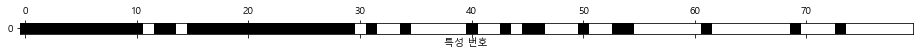

In [61]:
#In[54]
mask = select.get_support()
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

In [62]:
#In[55]
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.947


+ 특성 선택이 더 잘 되었으므로 0.94에서 0.951로 성능도 조금 향상됨

### 4.7.3 반복적 특성 선택
+ 반복적 특성 선택에서는 특성의 수가 각기 다른 일련의 모델이 만들어 진다.
  + 1. 특성을 하나도 선택하지 않은 상태에서 종료 조건에 도달할 때까지 하나씩 추가하는 방법
  + 2. 모든 특성을 가지고 시작해서 종료 조건까지 특성을 하나씩 제거해가는 방법 -> 일련의 모델이 만들어지기 때문에 계산 비용이 많이 든다.
+ 재귀적 특성 제거
  + 모든 특성으로 모델을 만들고 특성 중요도가 가장 낮은 특성을 제거
  + 그 다음 제거한 특성을 빼고 나머지 특성을 전체로 새로운 모델을 만듦. -> 미리 정의한 특성 개수가 남을 때까지 계속

([<matplotlib.axis.YTick at 0x183a79f6970>],
 <a list of 1 Text major ticklabel objects>)

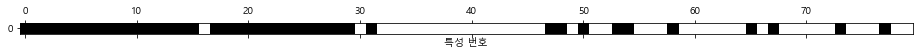

In [63]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
n_features_to_select=40)
select.fit(X_train, y_train)
# 선택된 특성을 표시합니다
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

+ 랜덤 포레스트 분류 모델을 사용한 RFE가 선택한 특성

In [64]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.940


In [65]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.930


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+ RFE를 사용해서 특성을 선택했을 때 로지스틱 회귀의 정확도

In [66]:
print("테스트 점수: {:.3f}".format(select.score(X_test, y_test)))

테스트 점수: 0.951


+ 특성 선택이 제대로 되면 선형 모델의 성능은 랜덤 포레스트와 비슷하다.
+ 머신러닝 알고리즘에 넣을 입력값을 정할 때 특성 자동 선택이 도움을 줄 수 있다.
+ 예측 속도를 높이거나 해석하기 더 쉬운 모델을 만들때 필요한 만큼 특성의 수를 줄이는 데도 효과적이다.

## 4.8 전문가 지식 활용
+ 작업에 내재된 사전 지식이 특성으로 추가된다면 머신러닝 알고리즘에 도움이 된다.  
ex) 항공료를 예측하는 알고리즘을 만들 때, 휴가 성수기나 공휴일 근처에는 항공료가 훨씬 비싸진다는 정
보를 추가

In [67]:
citibike = mglearn.datasets.load_citibike()

In [68]:
print("시티 바이크 데이터:\n", citibike.head())

시티 바이크 데이터:
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, '대여횟수')

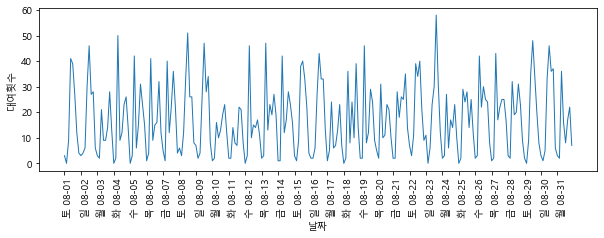

In [69]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
freq='D')
week = ["일", "월", "화","수", "목", "금", "토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"),
xticks.strftime(" %m-%d"))]
plt.xticks(xticks, xticks_name, rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

+ 시계열 데이터를 이용한 예측 작업은 과거 데이터에서 학습하여 미래를 예측하는 방식 사용
+ 특정 날짜까지의 모든 데이터를 훈련 세트로 하고, 그 날짜 이후의 모든 데이터를 테스트 세트로 사용
+ "1970년 1월 1일 00:00:00"부터 (또는 Unix 시간부터) 경과한 시간을 초로 나타낸 POSIX시간으로 날짜를
저장

In [70]:
# 타깃값 추출 (대여 횟수)
y = citibike.values
# POSIX 시간을 10**9로 나누어 변경
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [72]:
# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용합니다
n_train = 184
# 주어진 특성을 사용하여 평가하고 그래프를 만듭니다
def eval_on_features(features, target, regressor):
# 훈련 세트와 테스트 세트로 나눕니다
    X_train, X_test = features[:n_train], features[n_train:]
# 타깃값도 나눕니다
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")
    plt.plot(range(n_train), y_train, label="훈련")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="테스트")
    plt.plot(range(n_train), y_pred_train, '--', label="훈련 예측")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
    label="테스트 예측")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")

테스트 세트 R^2: -0.04


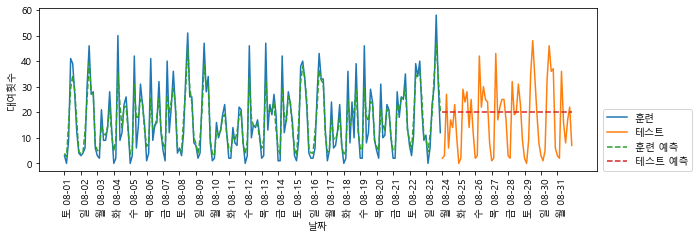

In [73]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

+ 24일 이후로 테스트 예측 그래프가 수평선임 -> 학습되지 않음
+ 테스트 세트에 있는 POSIX 시간 특성의 값은 훈련 세트에 있는 특성 값의 범위 밖이기 때문
+ 랜덤 포레스트는 훈련 세트에 있는 특성의 범위 밖으로 외삽할 수 있는 능력이 없음.(예측 능력이 없음)
+ 외삽 : 이용 가능한 범위가 한정되어 있어 그 범위 이상의 값을 구할 수 없을 때 관측된 값을 이용하여 한계점 이상의 값을 추정하는 것
+ 따라서 테스트 세트와 가장 가까이 있는 마지막 훈련 세트 데이터를 예측으로 사용

+ 여기에 전문가 지식사용
+ 여기서 전문가 지식은 시간과 요일이라는 두 가지 특성을 말함

테스트 세트 R^2: 0.60


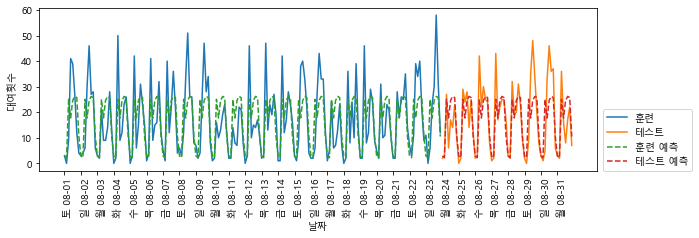

In [74]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

+ 시간 정보를 추가한 결과 R^2이 훨씬 나아졌지만 주간 패턴은 예측하지 못함

테스트 세트 R^2: 0.84


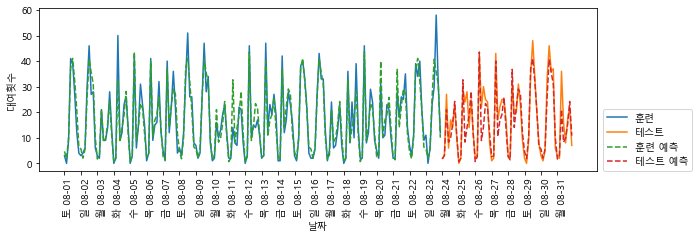

In [75]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

+ R^2이 0.84로 상당히 좋은 예측 성능

테스트 세트 R^2: 0.13


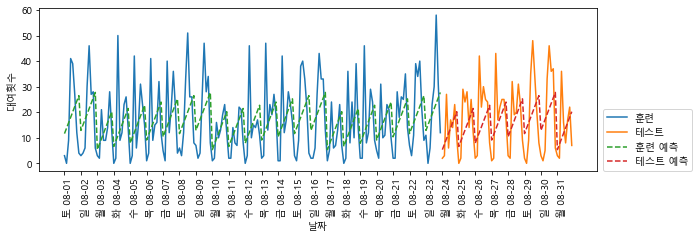

In [76]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

+ LinearRegression 모델은 잘 예측하지 못함 -> 요일과 시간이 정수로 인코딩되어 있어서 연속형 변수로
해석되기 때문
+ 따라서 OneHotEncoder를 사용하여 정수형을 범주형 변수로 해석

In [77]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

테스트 세트 R^2: 0.62


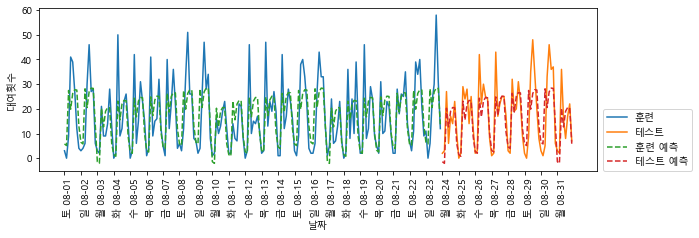

In [78]:
from sklearn.linear_model import Ridge
eval_on_features(X_hour_week_onehot, y, Ridge())

+ 선형 모델은 요일, 시간마다 하나의 계수를 학습함

테스트 세트 R^2: 0.85


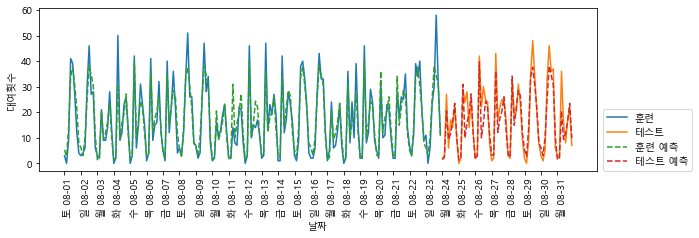

In [79]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

+ 특성 변환을 통해 모델의 성능이 랜덤 포레스트와 비슷해짐
+ 선형 모델의 장점 : 무엇이 학습됐는지가 명확하고 학습계수를 그래프로 나타낼 수 있다.

In [80]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["월", "화", "수", "목", "금", "토", "일"]
features = day + hour

In [81]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, '계수 크기')

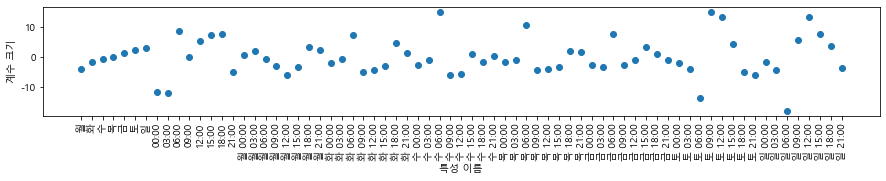

In [82]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")

+ 시간과 요일의 곱을 사용한 선형 모델의 계수